In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
train = pd.read_csv('train_session4.csv')
test = pd.read_csv('test_session4.csv')
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train =  train.drop(['Cabin'],axis=1)
test =  test.drop(['Cabin'],axis=1)
train = train.dropna(axis = 0,subset=['Embarked'],how='any')

In [ ]:
(train.Age.isnull().sum() / train.shape[0]) * 100

19.910011248593925

In [ ]:
train['Age'].fillna( train['Age'].median() , inplace=True)
test['Age'].fillna( train['Age'].median() , inplace=True)
test['Fare'].fillna( train['Fare'].median() , inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:

train["Sex"]= np.where(train["Sex"]=="female",0,1)
test["Sex"]= np.where(test["Sex"]=="female",0,1)

In [ ]:
train =  train.drop(['Name'],axis=1)
test =  test.drop(['Name'],axis=1)

In [ ]:
train =  train.drop(['Ticket'],axis=1)
test =  test.drop(['Ticket'],axis=1)

In [ ]:
ID = test.PassengerId
train =  train.drop(['PassengerId'],axis=1)
test =  test.drop(['PassengerId'],axis=1)

In [ ]:
train["Embarked"]= np.where(train["Embarked"]=="C",1,np.where(train["Embarked"]=="S",2,3))
test["Embarked"]= np.where(test["Embarked"]=="C",1,np.where(test["Embarked"]=="S",2,3))

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:

X_train =  train.drop(['Survived'],axis=1)
y_train = train.Survived
X_test = test

In [ ]:
def sigmoid(input):    
  output = 1 / (1 + np.exp(-input))
  return output

In [ ]:
def costFunction(theta, X, y):
    m = y.size  
    J = 0
    h = sigmoid(np.dot(X, theta.T))
    J = 1/m * np.sum(-y*np.log(h) - (1-y) * np.log(1-h))
    return J

In [ ]:
def gradientDecsent(iterations, alpha, x, y):
  m = x.shape[0]
  x = np.concatenate([np.ones((m, 1)), x], axis=1)
  y = np.array(y)
  y = np.reshape(y, (len(y),1))  
  theta = np.full((1, x.shape[1]), 0)
  cost_history = []
  for i in range(iterations):
    theta = theta - (alpha / m) * np.transpose(sigmoid(np.dot(x, theta.T)) - y).dot(x)
    cost_history.append(costFunction(theta, x, y))
  return theta, cost_history 

In [ ]:
theta, cost_history = gradientDecsent(200000, 0.002, X_train, y_train)
print(theta)

[[ 3.70030795 -0.8427771  -2.566677   -0.02884885 -0.31598277 -0.09342107
   0.00522164  0.07626175]]


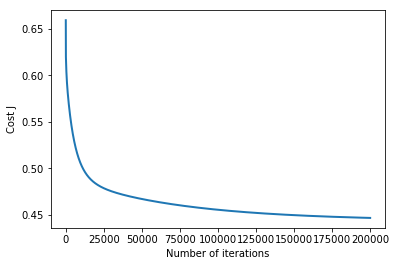

In [ ]:
plt.plot(np.arange(len(cost_history)), cost_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')   

In [ ]:
x_ones = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)
y_pred = sigmoid(np.dot(x_ones, theta.T))

In [ ]:
y_pred_final = []
for i in y_pred:
  if i >= 0.5:
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)
print(y_pred_final)      

[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 